In [4]:
pip install pandas 

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np 
data = pd.read_excel ('/Users/jalenfaison/Downloads/VisAtten.05_CNRI (3).xlsx')
df = pd.DataFrame(data)
df.corr()

,subject_ID,age,WithinConn,BetweenConn,SystemSeg,FullyCued_DriftRate,FullyCued_Nondecision,PartialCued_DriftRate,PartialCued_Nondecision
subject_ID,1.000000,0.938540,-0.407257,-0.523472,0.299347,-0.216187,0.448284,-0.199769,0.459850
age,0.938540,1.000000,-0.407779,-0.543795,0.323087,-0.239139,0.435477,-0.216050,0.443612
WithinConn,-0.407257,-0.407779,1.000000,0.617005,0.121375,0.088155,-0.324363,0.185919,-0.317383
BetweenConn,-0.523472,-0.543795,0.617005,1.000000,-0.705262,0.173424,-0.350560,0.292338,-0.307991
SystemSeg,0.299347,0.323087,0.121375,-0.705262,1.000000,-0.143800,0.155205,-0.208024,0.109168
FullyCued_DriftRate,-0.216187,-0.239139,0.088155,0.173424,-0.143800,1.000000,-0.275344,0.482149,-0.235037
FullyCued_Nondecision,0.448284,0.435477,-0.324363,-0.350560,0.155205,-0.275344,1.000000,-0.211597,0.895273
PartialCued_DriftRate,-0.199769,-0.216050,0.185919,0.292338,-0.208024,0.482149,-0.211597,1.000000,-0.135976
PartialCued_Nondecision,0.459850,0.443612,-0.317383,-0.307991,0.109168,-0.235037,0.895273,-0.135976,1.000000


In [4]:
import pandas as pd
import numpy as np
data2 = pd.read_excel ('/Users/jalenfaison/Downloads/VisAtten.05_CNRI (3).xlsx')
df2 = pd.DataFrame(data2)
df2.corr()
df2[df2 > 0.05]

,subject_ID,age,WithinConn,BetweenConn,SystemSeg,FullyCued_DriftRate,FullyCued_Nondecision,PartialCued_DriftRate,PartialCued_Nondecision
0,10001,25,NaN,NaN,0.822870,0.185716,0.602452,0.304984,0.490625
1,10004,26,NaN,NaN,0.815698,0.241115,0.414481,0.269228,0.495891
2,10005,24,NaN,NaN,0.818178,0.297749,0.422886,0.356092,0.463052
3,10008,26,NaN,NaN,0.826351,0.244287,0.661728,0.256565,0.597101
4,10009,22,NaN,NaN,0.819954,0.181743,0.491066,0.250605,0.497143
...,...,...,...,...,...,...,...,...,...
60,12034,70,NaN,NaN,0.819642,0.316212,0.760289,0.280642,0.688771
61,12035,80,NaN,NaN,0.833211,0.209033,0.648553,0.212436,0.721406
62,12037,72,NaN,NaN,0.824881,0.208442,0.956154,0.247380,0.995770
63,12045,63,NaN,NaN,0.822324,0.202934,0.808461,0.248190,0.837000


In [7]:
import pandas as pd
import numpy as np 
data = pd.read_excel ('/Users/jalenfaison/Downloads/VisAtten.05_CNRI (3).xlsx')
df = pd.DataFrame(data)
x = df.age.corr(df.WithinConn)
y = df.age.corr(df.BetweenConn)
print (x, y)

-0.4077792728579609 -0.5437946859337677


In [8]:
from scipy import stats 
import pandas as pd 
import numpy as np 

r, p = stats.pearsonr(df.age, df.WithinConn)
r2, p2 = stats.pearsonr(df.age, df.BetweenConn)
print (round(r,5), round(p,5))
print (round(r2, 5), round(p2,5))

-0.40778 0.00075
-0.54379 0.0


In [21]:
from scipy import stats
import matplotlib.pyplot as plt

corr_df = pd.DataFrame(columns =['r','p'])
for col in df:
        if pd.api.types.is_numeric_dtype(df[col]) and col != 'age' and col != 'subject_ID':
            r, p = stats.pearsonr(df.age, df[col])
            corr_df.loc[col] = [round (r, 5), round(p, 5)]
            
print (corr_df)
print ('')

tResult1 = stats.ttest_rel(df.FullyCued_DriftRate, df.PartialCued_DriftRate)
tResult2 = stats.ttest_rel(df.FullyCued_Nondecision, df.PartialCued_Nondecision)

#print (df.head())

print (tResult1)
print (tResult2)

                               r        p
WithinConn              -0.40778  0.00075
BetweenConn             -0.54379  0.00000
SystemSeg                0.32309  0.00866
FullyCued_DriftRate     -0.23914  0.05504
FullyCued_Nondecision    0.43548  0.00029
PartialCued_DriftRate   -0.21605  0.08389
PartialCued_Nondecision  0.44361  0.00021

TtestResult(statistic=-5.678555158223024, pvalue=3.563676330943251e-07, df=64)
TtestResult(statistic=2.767346177431814, pvalue=0.007381053441141448, df=64)


<Axes: xlabel='age', ylabel='FullyCued_DriftRate'>

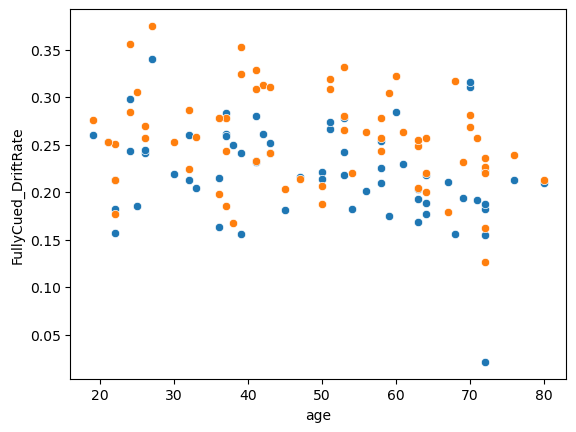

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel ('/Users/jalenfaison/Downloads/VisAtten.05_CNRI (3).xlsx')
sns.scatterplot(x= 'age', y= 'FullyCued_DriftRate', data = data)
sns.scatterplot(x= 'age', y= 'PartialCued_DriftRate', data = data)

<Axes: xlabel='age', ylabel='FullyCued_Nondecision'>

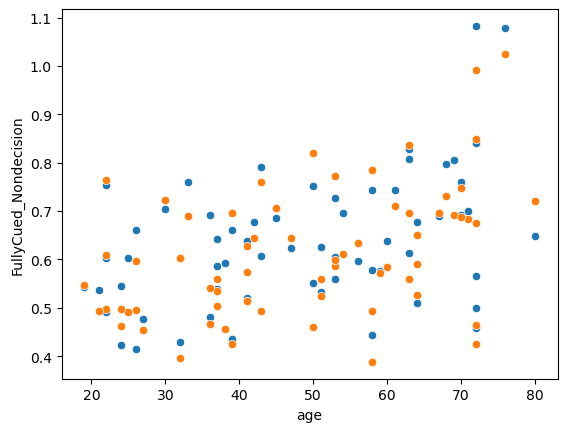

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel ('/Users/jalenfaison/Downloads/VisAtten.05_CNRI (3).xlsx')
sns.scatterplot(x= 'age', y= 'FullyCued_Nondecision', data = data)
sns.scatterplot(x= 'age', y= 'PartialCued_Nondecision', data = data)

<Axes: xlabel='WithinConn', ylabel='BetweenConn'>

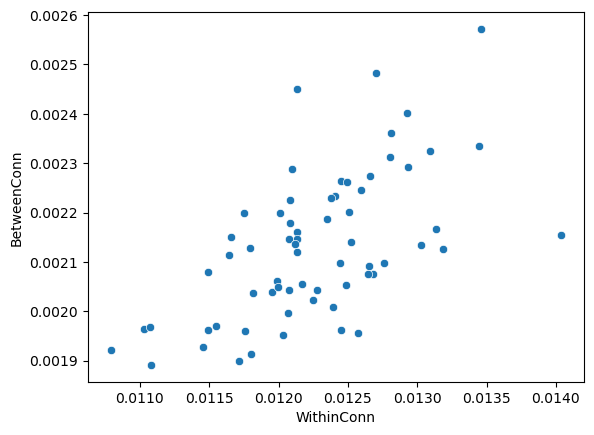

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel ('/Users/jalenfaison/Downloads/VisAtten.05_CNRI (3).xlsx')
sns.scatterplot(x= 'WithinConn', y= 'BetweenConn', data = data)

<Axes: xlabel='age', ylabel='WithinConn'>

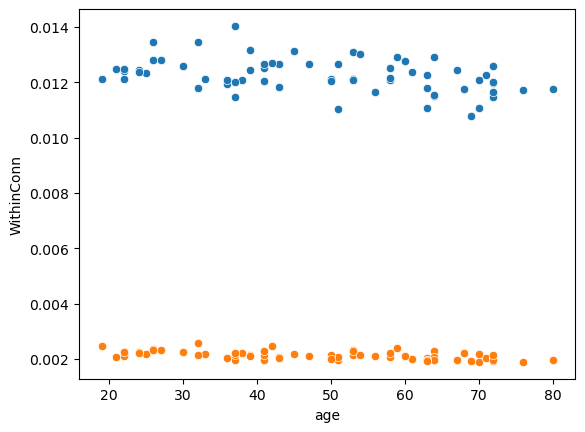

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel ('/Users/jalenfaison/Downloads/VisAtten.05_CNRI (3).xlsx')
sns.scatterplot(x= 'age', y= 'WithinConn', data = data)
sns.scatterplot(x= 'age', y= 'BetweenConn', data = data)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pingouin import partial_corr

print ("x")

x


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pingouin import partial_corr

data = pd.read_excel('/Users/jalenfaison/Downloads/VisAtten.05_CNRI-2.xlsx')
partial_corr(data = data, x ='FullyCued_Nondecision', y = 'WithinConn', covar = ['age'], method = 'pearson')

,n,r,CI95%,p-val
pearson,65,-0.17858,"[-0.41, 0.07]",0.157992


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pingouin import partial_corr

partial_corr(data = data, x ='FullyCued_Nondecision', y = 'BetweenConn', covar = ['age'], method = 'pearson')

,n,r,CI95%,p-val
pearson,65,-0.15057,"[-0.38, 0.1]",0.23499
